In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\trong\\OneDrive\\Documents\\Project\\amazon-ecommerce\\raw.csv")
display(df.head())

,id,top,link,rating_count,price,skin_type,category,brand,bought_info
0,B074PVTPBW,#1,https://www.amazon.com/Mighty-Patch-Hydrocollo...,"171,441",$12.99,Face,Treatments & Masks,Mighty Patch,100K+ bought in past month
1,B07PBXXNCY,#2,https://www.amazon.com/Clean-Skin-Club-Disposa...,"31,670",$17.95,Face,Cloths & Towelettes,CLEAN SKIN CLUB,100K+ bought in past month
2,B08KT2Z93D,#3,https://www.amazon.com/eos-Cashmere-Moisture-L...,"33,441",$8.98,Body,Lotions,eos,100K+ bought in past month
3,B00U2VQZDS,#4,https://www.amazon.com/Neutrogena-Cleansing-To...,"114,722",$9.97,Face,Cloths & Towelettes,Neutrogena,100K+ bought in past month
4,B01N9SPQHQ,#5,https://www.amazon.com/Roche-Posay-Toleriane-D...,"64,508",$23.99,Face,Face Moisturizers,La Roche-Posay,NaN


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   top           100 non-null    object
 2   link          100 non-null    object
 3   rating_count  100 non-null    object
 4   price         100 non-null    object
 5   skin_type     100 non-null    object
 6   category      100 non-null    object
 7   brand         85 non-null     object
 8   bought_info   79 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


None

In [4]:
df.duplicated(subset=['id']).sum()

np.int64(0)

In [5]:
df['top'] = df['top'].str.replace('#', '').astype(int)

In [6]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(int)

In [7]:
df['price'] = df['price'].str.replace('$', '').astype(float)

In [8]:
df['bought_info'] = df['bought_info'].astype(str).str.extract(r'(\d+)K\+')[0]

In [9]:
df['bought_info'] = pd.to_numeric(df['bought_info'], errors='coerce') * 1000

In [10]:
df.head()

,id,top,link,rating_count,price,skin_type,category,brand,bought_info
0,B074PVTPBW,1,https://www.amazon.com/Mighty-Patch-Hydrocollo...,171441,12.99,Face,Treatments & Masks,Mighty Patch,100000.0
1,B07PBXXNCY,2,https://www.amazon.com/Clean-Skin-Club-Disposa...,31670,17.95,Face,Cloths & Towelettes,CLEAN SKIN CLUB,100000.0
2,B08KT2Z93D,3,https://www.amazon.com/eos-Cashmere-Moisture-L...,33441,8.98,Body,Lotions,eos,100000.0
3,B00U2VQZDS,4,https://www.amazon.com/Neutrogena-Cleansing-To...,114722,9.97,Face,Cloths & Towelettes,Neutrogena,100000.0
4,B01N9SPQHQ,5,https://www.amazon.com/Roche-Posay-Toleriane-D...,64508,23.99,Face,Face Moisturizers,La Roche-Posay,NaN


In [11]:
data = df

In [12]:
from sklearn.preprocessing import LabelEncoder
# === LOẠI BỎ CÁC CỘT KHÔNG QUAN TRỌNG ===
df = df.drop(columns=['id', 'link'])

# === XỬ LÝ CÁC CỘT DẠNG OBJECT ===
label_cols = ['category', 'brand', 'skin_type']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

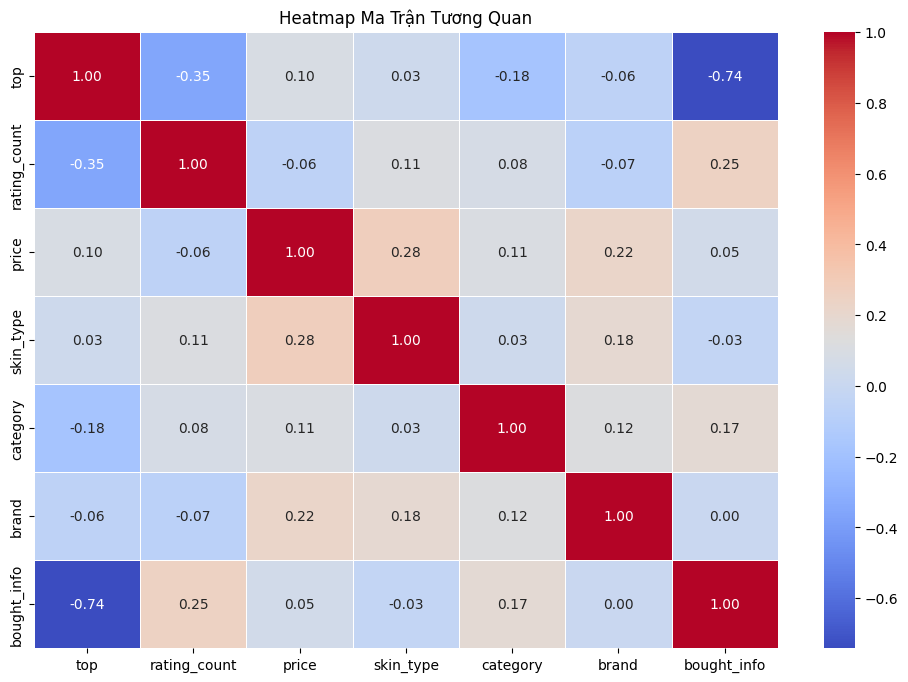

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Ma Trận Tương Quan")
plt.show()

In [14]:
#df['bought_info_linear'] = df['bought_info'].interpolate(method='linear')

Random Forest MSE: 66386562.5 - R²: 0.8779097701149425
XGBoost MSE: 72504835.03509521 - R²: 0.8666577746481008
Chọn mô hình tốt nhất: Random Forest


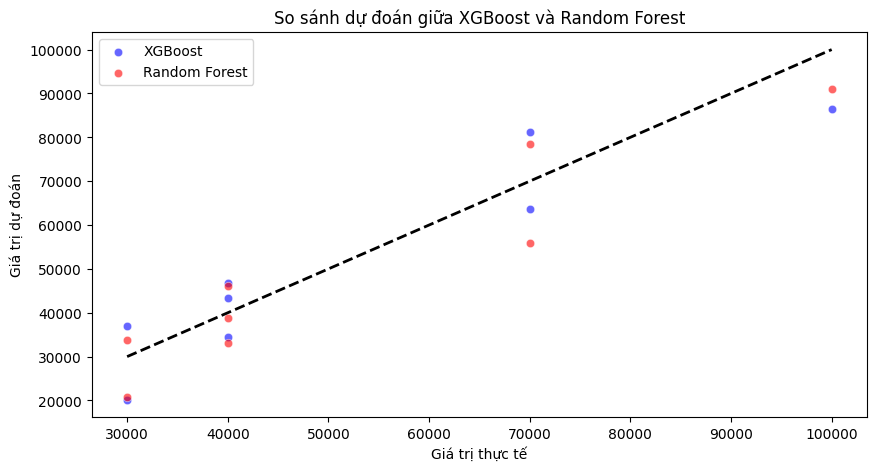

    predicted_bought_info
4                 96200.0
6                 90500.0
7                 89800.0
13                87500.0
14                82800.0


C:\Users\trong\AppData\Local\Temp\ipykernel_2832\2532637483.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["predicted_bought_info"] = rf_best.predict(X_test_scaled)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ==== CHỌN PHƯƠNG PHÁP CHUẨN HÓA ====
scaling_method = "standard"  # Chọn "standard" hoặc "minmax"

# ==== CHIA DỮ LIỆU ====
df_train = df[df['bought_info'].notna()]
df_test = df[df['bought_info'].isna()]

X = df_train.drop(columns=['bought_info'])
y = df_train['bought_info']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# ==== CHUẨN HÓA DỮ LIỆU ====
scaler = StandardScaler() if scaling_method == "standard" else MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ==== HUẤN LUYỆN MÔ HÌNH RANDOM FOREST ====
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_grid.fit(X_train_scaled, y_train)

# ==== HUẤN LUYỆN MÔ HÌNH XGBOOST ====
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0.1, 0.5],  # L1 Regularization
    'reg_lambda': [0.5, 1.0]  # L2 Regularization
}
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_grid = RandomizedSearchCV(xgb, xgb_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
xgb_grid.fit(X_train_scaled, y_train)

# ==== ĐÁNH GIÁ MÔ HÌNH ====
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

rf_pred = rf_best.predict(X_val_scaled)
xgb_pred = xgb_best.predict(X_val_scaled)

rf_mse = mean_squared_error(y_val, rf_pred)
xgb_mse = mean_squared_error(y_val, xgb_pred)

rf_r2 = r2_score(y_val, rf_pred)
xgb_r2 = r2_score(y_val, xgb_pred)

print(f"Random Forest MSE: {rf_mse} - R²: {rf_r2}")
print(f"XGBoost MSE: {xgb_mse} - R²: {xgb_r2}")

# ==== CHỌN MÔ HÌNH TỐT NHẤT ====
best_model = "Random Forest" if rf_mse < xgb_mse else "XGBoost"
print(f"Chọn mô hình tốt nhất: {best_model}")

# ==== VẼ BIỂU ĐỒ KẾT QUẢ ====
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_val, y=xgb_pred, label="XGBoost", color="blue", alpha=0.6)
sns.scatterplot(x=y_val, y=rf_pred, label="Random Forest", color="red", alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Đường chuẩn
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh dự đoán giữa XGBoost và Random Forest")
plt.legend()
plt.show()


# ==== CHUẨN HÓA DỮ LIỆU TEST ====
X_test = df_test.drop(columns=['bought_info'])
X_test_scaled = scaler.transform(X_test)

# ==== DỰ ĐOÁN VỚI MÔ HÌNH TỐT NHẤT ====
if best_model == "Random Forest":
    df_test["predicted_bought_info"] = rf_best.predict(X_test_scaled)
else:
    df_test["predicted_bought_info"] = xgb_best.predict(X_test_scaled)

# ==== XEM KẾT QUẢ ====
print(df_test[["predicted_bought_info"]].head())

In [16]:
# === fill giá trị đã ước lương để thay thế nan trong cột bought_info === 
data.loc[data['bought_info'].isna(), 'bought_info'] = df_test['predicted_bought_info']

In [17]:
data.head()

,id,top,link,rating_count,price,skin_type,category,brand,bought_info
0,B074PVTPBW,1,https://www.amazon.com/Mighty-Patch-Hydrocollo...,171441,12.99,Face,Treatments & Masks,Mighty Patch,100000.0
1,B07PBXXNCY,2,https://www.amazon.com/Clean-Skin-Club-Disposa...,31670,17.95,Face,Cloths & Towelettes,CLEAN SKIN CLUB,100000.0
2,B08KT2Z93D,3,https://www.amazon.com/eos-Cashmere-Moisture-L...,33441,8.98,Body,Lotions,eos,100000.0
3,B00U2VQZDS,4,https://www.amazon.com/Neutrogena-Cleansing-To...,114722,9.97,Face,Cloths & Towelettes,Neutrogena,100000.0
4,B01N9SPQHQ,5,https://www.amazon.com/Roche-Posay-Toleriane-D...,64508,23.99,Face,Face Moisturizers,La Roche-Posay,96200.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   top           100 non-null    int64  
 2   link          100 non-null    object 
 3   rating_count  100 non-null    int64  
 4   price         100 non-null    float64
 5   skin_type     100 non-null    object 
 6   category      100 non-null    object 
 7   brand         85 non-null     object 
 8   bought_info   100 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [19]:
data['brand'] = data['brand'].fillna("unknown")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   top           100 non-null    int64  
 2   link          100 non-null    object 
 3   rating_count  100 non-null    int64  
 4   price         100 non-null    float64
 5   skin_type     100 non-null    object 
 6   category      100 non-null    object 
 7   brand         100 non-null    object 
 8   bought_info   100 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [21]:
# Kmeans 
from sklearn.preprocessing import LabelEncoder
# === LOẠI BỎ CÁC CỘT KHÔNG QUAN TRỌNG ===
df = data.drop(columns=['id', 'link'])

# === XỬ LÝ CÁC CỘT DẠNG OBJECT ===
label_cols = ['category', 'brand', 'skin_type']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

In [22]:
df.head()

,top,rating_count,price,skin_type,category,brand,bought_info
0,1,171441,12.99,2,28,29,100000.0
1,2,31670,17.95,2,7,9,100000.0
2,3,33441,8.98,0,15,52,100000.0
3,4,114722,9.97,2,7,33,100000.0
4,5,64508,23.99,2,9,24,96200.0


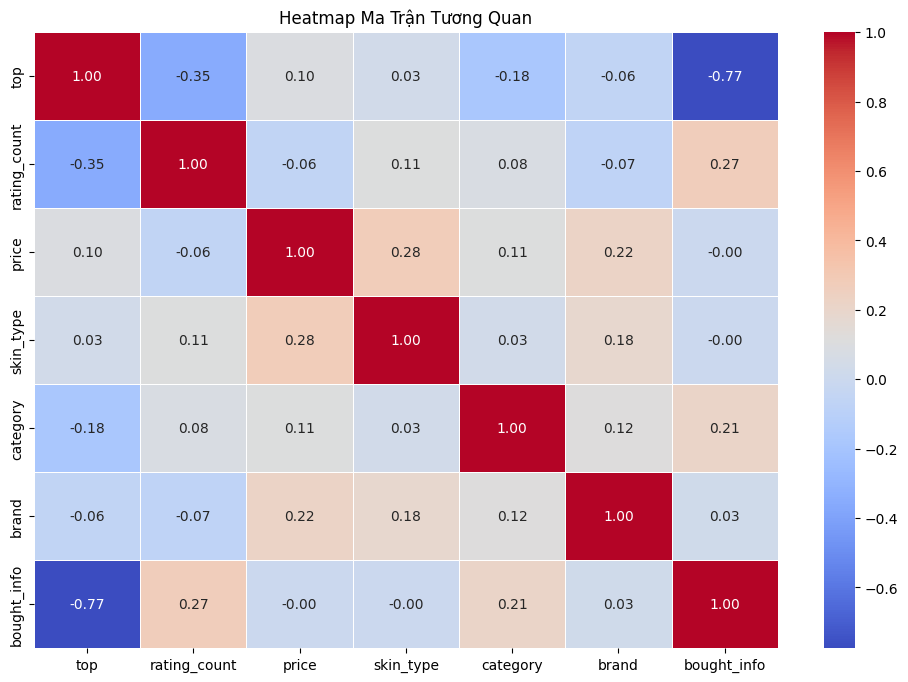

In [23]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Ma Trận Tương Quan")
plt.show()

In [24]:
df = df.drop(columns=['skin_type', 'brand', 'price', 'category'])

In [25]:
df.head()

,top,rating_count,bought_info
0,1,171441,100000.0
1,2,31670,100000.0
2,3,33441,100000.0
3,4,114722,100000.0
4,5,64508,96200.0


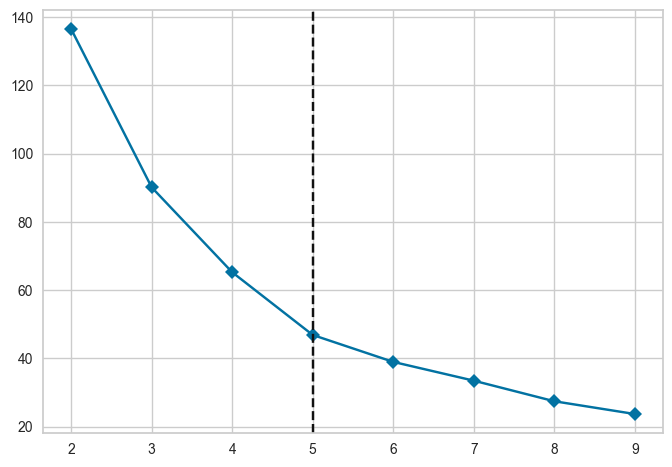

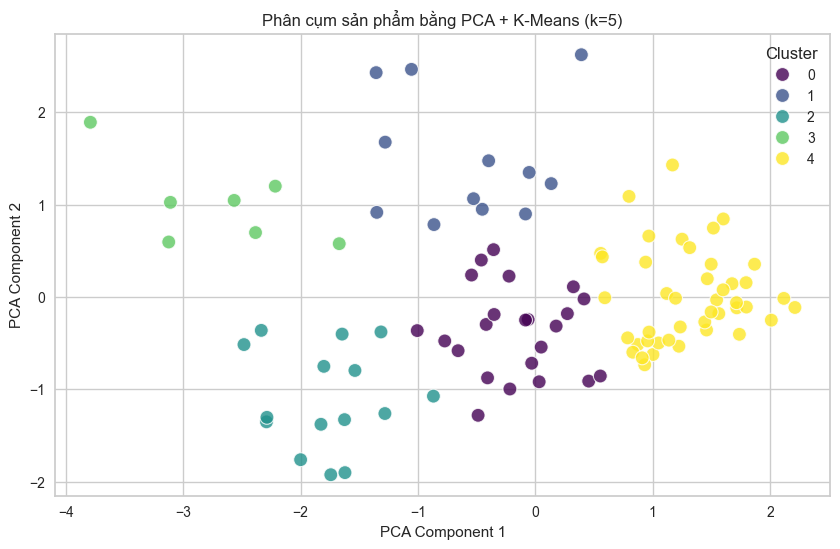

         bought_info  rating_count    top
cluster                                  
0           45168.26      30638.26  39.61
1           34308.33     102922.42  44.25
2           88306.67      32311.47  13.07
3           86114.29     121827.14  12.14
4           22548.84      21607.09  77.37


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X_pca)

optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', s=100, alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Phân cụm sản phẩm bằng PCA + K-Means (k={optimal_k})')
plt.legend(title='Cluster')
plt.show()

optimal_k, df['cluster'].value_counts()

cluster_means = df.groupby("cluster")[["bought_info", "rating_count", "top"]].mean()
print(cluster_means.round(2))


In [80]:
df

,top,rating_count,bought_info,cluster
0,1,171655,100000.0,4
1,2,31949,100000.0,1
2,3,34136,100000.0,1
3,4,114893,100000.0,4
4,5,3587,100000.0,1
...,...,...,...,...
95,96,7865,30000.0,3
96,97,86544,20000.0,2
97,98,51841,40000.0,3
98,99,39794,10000.0,3


In [29]:
def assign_cluster_labels(df):
    cluster_summary = df.groupby("cluster")[["bought_info", "rating_count", "top"]].mean()
    print("Cluster summary:\n", cluster_summary)

    top_threshold = cluster_summary["top"].mean()  
    rating_threshold = cluster_summary["rating_count"].mean()  
    
    # Tìm các cụm thỏa mãn top > threshold và rating <= threshold
    potential_clusters = cluster_summary[
        (cluster_summary["top"] > top_threshold) & 
        (cluster_summary["rating_count"] <= rating_threshold)
    ].index.tolist()

    # So sánh bought_info trong potential_clusters
    if len(potential_clusters) > 1:
        bought_values = cluster_summary.loc[potential_clusters, "bought_info"]
        max_bought_cluster = bought_values.idxmax()
        for cluster in potential_clusters:
            if cluster == max_bought_cluster:
                df.loc[df["cluster"] == cluster, "cluster_label"] = "Potential Growth"
            else:
                df.loc[df["cluster"] == cluster, "cluster_label"] = "Steady Seller"
    elif len(potential_clusters) == 1:
        df.loc[df["cluster"] == potential_clusters[0], "cluster_label"] = "Potential Growth"

    # Gán nhãn cho các cụm còn lại
    for cluster in cluster_summary.index:
        if cluster not in potential_clusters:
            rating = cluster_summary.loc[cluster, "rating_count"]
            top = cluster_summary.loc[cluster, "top"]
            
            if top <= top_threshold:
                if rating > rating_threshold:
                    df.loc[df["cluster"] == cluster, "cluster_label"] = "Sustainable trend"
                else:
                    df.loc[df["cluster"] == cluster, "cluster_label"] = "Trending"
            else:
                if rating > rating_threshold:
                    df.loc[df["cluster"] == cluster, "cluster_label"] = "Trending again"
    # In thông tin kiểm tra (tùy chọn)
    print("Cluster summary:\n", cluster_summary)
    print("Thresholds: top =", top_threshold, "rating =", rating_threshold)
    print("Cluster mapping:\n", df.groupby("cluster")["cluster_label"].first())
    return df

In [30]:
assign_cluster_labels(df)

Cluster summary:
           bought_info   rating_count        top
cluster                                        
0        45168.260870   30638.260870  39.608696
1        34308.333333  102922.416667  44.250000
2        88306.666667   32311.466667  13.066667
3        86114.285714  121827.142857  12.142857
4        22548.837209   21607.093023  77.372093
Cluster summary:
           bought_info   rating_count        top
cluster                                        
0        45168.260870   30638.260870  39.608696
1        34308.333333  102922.416667  44.250000
2        88306.666667   32311.466667  13.066667
3        86114.285714  121827.142857  12.142857
4        22548.837209   21607.093023  77.372093
Thresholds: top = 37.288062496990705 rating = 61861.27601665944
Cluster mapping:
 cluster
0     Potential Growth
1       Trending again
2             Trending
3    Sustainable trend
4        Steady Seller
Name: cluster_label, dtype: object


,top,rating_count,bought_info,cluster,cluster_label
0,1,171441,100000.0,3,Sustainable trend
1,2,31670,100000.0,2,Trending
2,3,33441,100000.0,2,Trending
3,4,114722,100000.0,3,Sustainable trend
4,5,64508,96200.0,2,Trending
...,...,...,...,...,...
95,96,3336,10000.0,4,Steady Seller
96,97,2727,20000.0,4,Steady Seller
97,98,46557,22310.0,4,Steady Seller
98,99,33727,30000.0,4,Steady Seller


In [49]:
df

,top,rating_count,bought_info,Cluster,cluster_label
0,1,171655,100000.0,4,Potential Growth
1,2,31949,100000.0,1,Potential Growth
2,3,34136,100000.0,1,Potential Growth
3,4,114893,100000.0,4,Potential Growth
4,5,3587,100000.0,1,Potential Growth
...,...,...,...,...,...
95,96,7865,30000.0,3,Stable Trend
96,97,86544,20000.0,2,Popular & Trusted
97,98,51841,40000.0,3,Stable Trend
98,99,39794,10000.0,3,Stable Trend
